# Laboratorio 5
## Parte 1
---

In [75]:
# Librerias
from scapy.all import *
import pandas as pd 
import binascii
import seaborn as sns

#### 1. Capture 100 paquetes con la herramienta scapy, imprima el tipo de datos, la longitud y el contenido del pcap

In [54]:
own_packets_pcap = sniff(count = 100)

#### 2. Añada al pcap de 100 paquetes el archivo analisis_paquetes.pcap

In [55]:
analisis_paquetes = rdpcap('./analisis_paquetes.pcap')

analisis_paquetes = analisis_paquetes + own_packets_pcap

#### 3. Convierta el pcap a un DataFrame

In [67]:
fields = {
    "IP": tuple(field.name for field in IP().fields_desc),
    "TCP": tuple(field.name for field in TCP().fields_desc),
    "UDP": tuple(field.name for field in UDP().fields_desc)
}

df = pd.DataFrame({field: [getattr(pkt[layer], field) if layer in pkt else pd.NA
                           for pkt in analisis_paquetes]
                   for layer, field_list in fields.items()
                   for field in field_list})

In [68]:
df.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,961,1,,0,64,17,21222,...,None,None,None,None,62990,None,None,933,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
0,4,5,32,84,58919,,0,122,17,13836,...,None,None,None,None,65061,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
0,4,5,0,975,1,,0,64,17,21208,...,None,None,None,None,36378,None,None,947,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
0,4,5,32,84,59493,,0,122,17,13262,...,None,None,None,None,65063,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
0,4,5,0,1012,1,,0,64,17,21171,...,None,None,None,None,63846,None,None,984,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...


#### 4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port

In [69]:
df[['src','dst','sport','dport']]

,src,dst,sport,dport
0,10.1.10.53,84.54.22.33,53,53
0,84.54.22.33,10.1.10.53,53,53
0,10.1.10.53,84.54.22.33,53,53
0,84.54.22.33,10.1.10.53,53,53
0,10.1.10.53,84.54.22.33,53,53
...,...,...,...,...
0,127.0.0.1,127.0.0.1,62740,62741
0,127.0.0.1,127.0.0.1,62741,62740
0,127.0.0.1,127.0.0.1,62740,62741
0,127.0.0.1,127.0.0.1,62741,62740


#### 5. Estadísticas

   ##### a. Muestre cual es la IP origen que más aparece
    

In [61]:
n = 1
in_a = df['src'].value_counts()[:n].index.tolist()[0]
in_a

'127.0.0.1'

   ##### b. Muestre cual es la IP destino que más aparece

In [62]:
n = 1
in_b = df['dst'].value_counts()[:n].index.tolist()[0]
in_b

'127.0.0.1'

   ##### c. ¿A qué IPs se comunica la IP del inciso a?

In [63]:
df[df['src'] == in_a]['dst'].unique()

array(['127.0.0.1'], dtype=object)

   ##### d. ¿A qué puertos destino se comunica la IP del inciso a?

In [74]:
df[df['src'] == in_a]['dport'].unique()

array([62889, 8888, 50243, 50244, 62740, 62741, 50930, 50931],
      dtype=object)

   ##### e. ¿A qué puertos origen se comunica la IP del inciso a?

In [65]:
df[df['src'] == in_a]['sport'].unique()

array([8888, 62889, 50244, 50243, 62741, 62740, 50931, 50930],
      dtype=object)

   ##### f. ¿Para que se utiliza el puerto que más aparece en el inciso d y e?

    El puerto usa el Protocolo de Control de Transmisión. TCP es uno de los protocolos principales en redes TCP/IP. TCP puerto garantiza la entrega de paquetes de datos en la misma orden, en que fueron mandados. La comunicación garantizada por el puerto TCP es la diferencia mayor entre TCP y UDP.

#### 6. Gráficas
  
   ##### a. Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads enviados de dichas direcciones.


<AxesSubplot:xlabel='count', ylabel='src'>

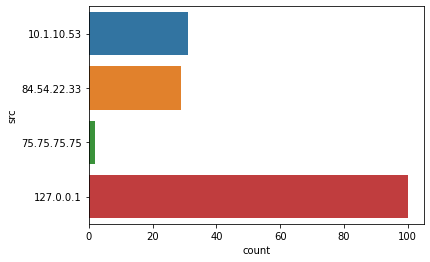

In [76]:
sns.countplot(
    data = df,
    y = 'src',
)

##### b. Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads recibidos en dichas direcciones.

<AxesSubplot:xlabel='payload', ylabel='dst'>

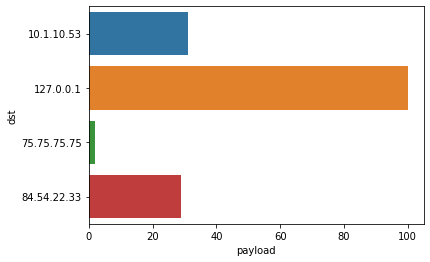

In [127]:
df_b = df.groupby('dst').count()['payload'].to_frame()
df_b.reset_index(inplace=True)

sns.barplot(x="payload", y="dst", data=df_b)


##### c. Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los payloads enviados de dichos puertos.


<AxesSubplot:xlabel='count', ylabel='sport'>

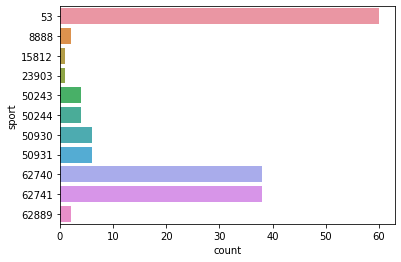

In [130]:

sns.countplot(
    data = df,
    y = 'sport',
)



##### d. Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los payloads recibidos en dichos puertos.


<AxesSubplot:xlabel='payload', ylabel='dport'>

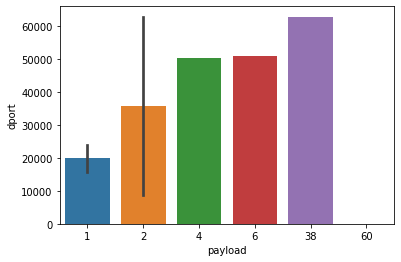

In [135]:
df_d = df.groupby('dport').count()['payload'].to_frame()
df_d.reset_index(inplace=True)

sns.barplot(x="payload", y="dport", data=df_d)

#### Investigación del payload

##### a. Cree un nuevo DF que incluya únicamente la conversación de la dirección IP origen más frecuente


In [139]:
df_new = df[df['src'] == in_a]
df_new.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,656,21187,DF,0,128,6,0,...,5,0,PA,8308,43888,0,0,616,"b'\x81~\x02d{""header"": {""msg_id"": ""2ac8fb38-7a...",b'817e02647b22686561646572223a207b226d73675f69...
0,4,5,0,40,21188,DF,0,128,6,0,...,5,0,A,8244,44183,0,None,0,b'',b''
0,4,5,0,41,21189,DF,0,128,6,0,...,5,0,PA,65535,6891,0,0,1,b'M',b'4d'
0,4,5,0,40,21190,DF,0,128,6,0,...,5,0,A,47481,44665,0,None,0,b'',b''
0,4,5,0,41,21191,DF,0,128,6,0,...,5,0,PA,65535,6890,0,0,1,b'M',b'4d'


##### b. Obtenga un nuevo DF con las columnas Src Address, Dst Address y agrúpelas por payload


In [143]:
df_payload = df_top .groupby(by = ['payload'])
df_payload = df_payload[['src', 'dst', 'payload']]
df_payload.head()

,src,dst,payload
0,127.0.0.1,127.0.0.1,616
0,127.0.0.1,127.0.0.1,0
0,127.0.0.1,127.0.0.1,1
0,127.0.0.1,127.0.0.1,0
0,127.0.0.1,127.0.0.1,1
0,127.0.0.1,127.0.0.1,0
0,127.0.0.1,127.0.0.1,675
0,127.0.0.1,127.0.0.1,0
0,127.0.0.1,127.0.0.1,1
0,127.0.0.1,127.0.0.1,0


##### c. Obtenga la IP que más ha intercambiado bytes con la IP más frecuente. Esta IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.


In [144]:
bytes_exchange = df_top['dst'].unique()
bytes_exchange


array(['127.0.0.1'], dtype=object)

In [145]:
df_top['dst'].value_counts()

127.0.0.1    100
Name: dst, dtype: int64

##### d. Cree un nuevo DF con la conversación entre la IP más frecuenta y la IP sospechosa.

In [147]:
df_bytes_exchange = df[(df['src'] == in_a) & (df['dst'] == bytes_exchange[0])]
df_bytes_exchange

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,656,21187,DF,0,128,6,0,...,5,0,PA,8308,43888,0,0,616,"b'\x81~\x02d{""header"": {""msg_id"": ""2ac8fb38-7a...",b'817e02647b22686561646572223a207b226d73675f69...
0,4,5,0,40,21188,DF,0,128,6,0,...,5,0,A,8244,44183,0,None,0,b'',b''
0,4,5,0,41,21189,DF,0,128,6,0,...,5,0,PA,65535,6891,0,0,1,b'M',b'4d'
0,4,5,0,40,21190,DF,0,128,6,0,...,5,0,A,47481,44665,0,None,0,b'',b''
0,4,5,0,41,21191,DF,0,128,6,0,...,5,0,PA,65535,6890,0,0,1,b'M',b'4d'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4,5,0,40,21282,DF,0,128,6,0,...,5,0,A,55213,27788,0,None,0,b'',b''
0,4,5,0,41,21283,DF,0,128,6,0,...,5,0,PA,65535,63280,0,0,1,b'M',b'4d'
0,4,5,0,40,21284,DF,0,128,6,0,...,5,0,A,55212,27788,0,None,0,b'',b''
0,4,5,0,41,21285,DF,0,128,6,0,...,5,0,PA,65535,63279,0,0,1,b'M',b'4d'


##### e. Obtenga los payloads del DF del inciso 6, y añada cada uno en un array.

In [149]:
array_bytes_exchange = df_bytes_exchange['payload_raw'].to_numpy()

##### f. Muestre el contenido del array.

In [150]:
array_bytes_exchange

array([b'\x81~\x02d{"header": {"msg_id": "2ac8fb38-7a02a99833028bb5635b06e6_8800_600", "msg_type": "status", "username": "username", "session": "2ac8fb38-7a02a99833028bb5635b06e6", "date": "2022-04-17T23:07:53.923305Z", "version": "5.3"}, "msg_id": "2ac8fb38-7a02a99833028bb5635b06e6_8800_600", "msg_type": "status", "parent_header": {"date": "2022-04-17T23:07:53.923000Z", "msg_id": "387775621f4749db86c91f9692a0e7f5", "username": "username", "session": "73aa5894c5af4bf8aa66b184bfccc4b0", "msg_type": "execute_request", "version": "5.2"}, "metadata": {}, "content": {"execution_state": "busy"}, "buffers": [], "channel": "iopub"}',
       b'', b'M', b'', b'M', b'',
       b'\x81~\x02\x9f{"header": {"msg_id": "2ac8fb38-7a02a99833028bb5635b06e6_8800_601", "msg_type": "execute_input", "username": "username", "session": "2ac8fb38-7a02a99833028bb5635b06e6", "date": "2022-04-17T23:07:53.924289Z", "version": "5.3"}, "msg_id": "2ac8fb38-7a02a99833028bb5635b06e6_8800_601", "msg_type": "execute_input"

##### g. Examine los primeros bytes del contenido, ¿encuentra algún dato que no haga sentido que se envie a través del puerto explicado en el inciso f?

In [151]:
df_bytes_exchange[['payload', 'payload_raw', 'src', 'sport', 'dst', 'dport']]

,payload,payload_raw,src,sport,dst,dport
0,616,"b'\x81~\x02d{""header"": {""msg_id"": ""2ac8fb38-7a...",127.0.0.1,8888,127.0.0.1,62889
0,0,b'',127.0.0.1,62889,127.0.0.1,8888
0,1,b'M',127.0.0.1,50244,127.0.0.1,50243
0,0,b'',127.0.0.1,50243,127.0.0.1,50244
0,1,b'M',127.0.0.1,50244,127.0.0.1,50243
...,...,...,...,...,...,...
0,0,b'',127.0.0.1,62740,127.0.0.1,62741
0,1,b'M',127.0.0.1,62741,127.0.0.1,62740
0,0,b'',127.0.0.1,62740,127.0.0.1,62741
0,1,b'M',127.0.0.1,62741,127.0.0.1,62740
